In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install xlrd

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)


## Data reading

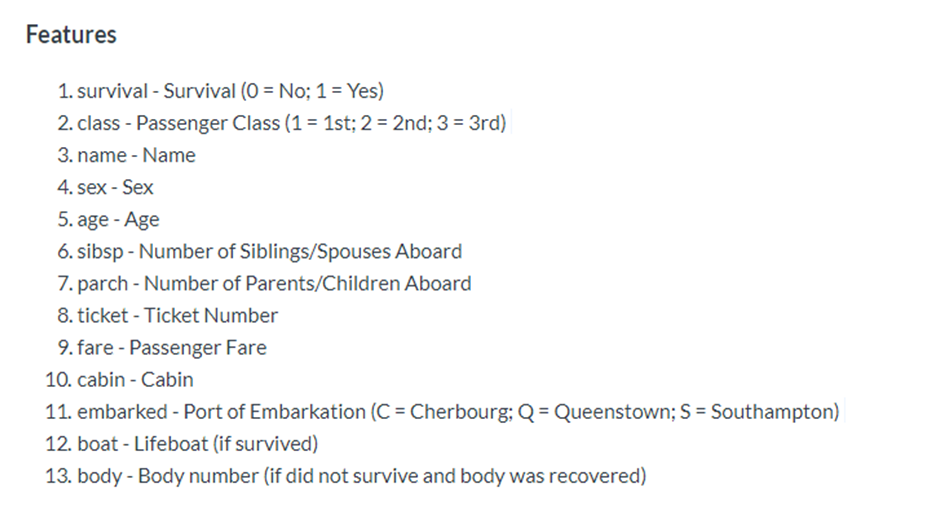

In [6]:
dataset = pd.read_excel('../data/titanic3.xls')
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
dataset.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [12]:
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## handling missing values

In [ ]:
## removing cabin, boat and body columns which has more null values and not useful thuogh
dataset.drop(columns=['cabin', 'boat', 'body'], inplace=True)
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [14]:
dataset.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

### fill mean value for age, fare

In [17]:
dataset['age'].fillna(dataset['age'].mean(), inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_16324\2031761378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(dataset['age'].mean(), inplace=True)


In [18]:
dataset['age'].isnull().sum()

np.int64(0)

In [21]:
dataset['fare'].mean()

np.float64(33.295479281345564)

In [20]:
dataset['fare'].fillna(dataset['fare'].mean(), inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_16324\3133616104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['fare'].fillna(dataset['fare'].mean(), inplace=True)


### fill mode value for categorical columns home.dest, embarked

In [23]:
dataset['embarked'].mode()

0    S
Name: embarked, dtype: object

In [27]:
dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

In [29]:
dataset['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
dataset['home.dest'].fillna(dataset['home.dest'].mode()[0], inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_16324\1946642182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['home.dest'].fillna(dataset['home.dest'].mode()[0], inplace=True)


In [31]:
dataset.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

## univariate analysis

In [34]:
dataset['age'].describe()

count    1309.000000
mean       29.881135
std        12.883199
min         0.166700
25%        22.000000
50%        29.881135
75%        35.000000
max        80.000000
Name: age, dtype: float64

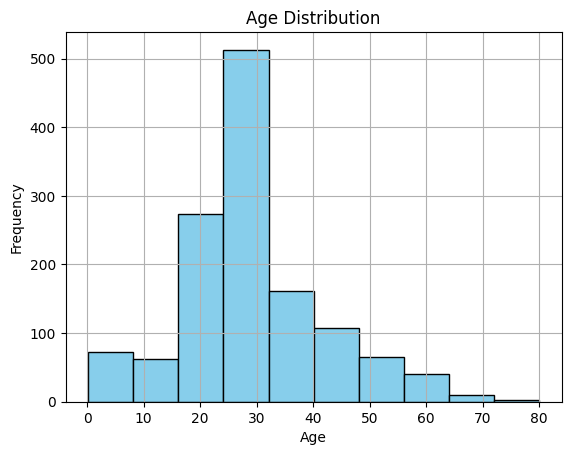

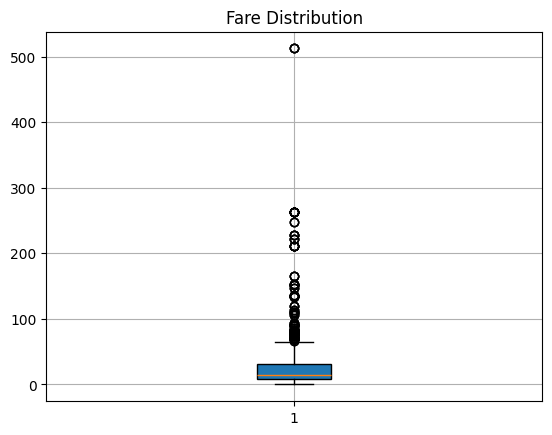

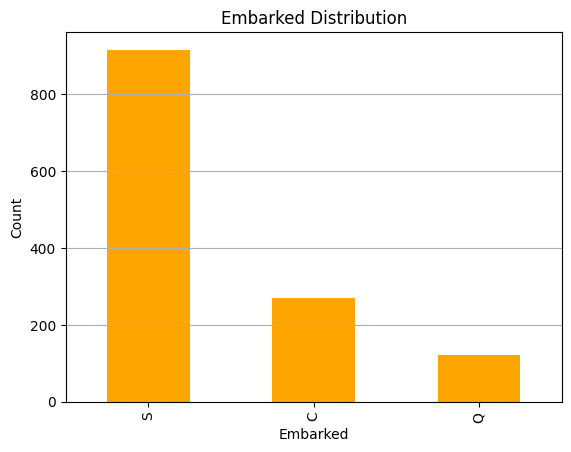

In [ ]:
plt.hist(dataset['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.boxplot(dataset['fare'], patch_artist=True)
plt.title('Fare Distribution')
plt.grid(True)
plt.show()

dataset['embarked'].value_counts().plot(kind='bar', color='orange')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

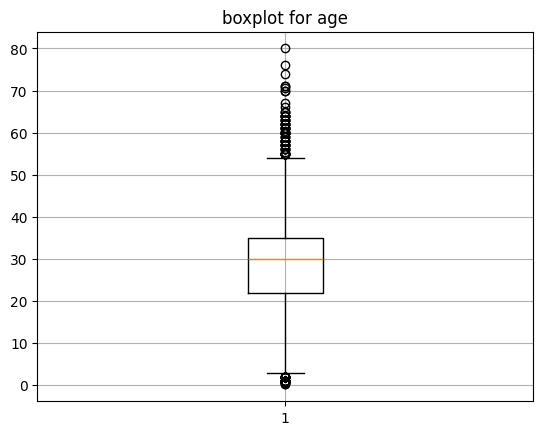

In [35]:
# there were more members of age 15 to 50 so lets plot boxplot
plt.boxplot(dataset['age'])
plt.title("boxplot for age")
plt.grid(True)
plt.show()

In [37]:
Q1 = dataset['age'].quantile(0.25)  
Q3 = dataset['age'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['age'] < lower_bound) | (dataset['age'] > upper_bound)]
print("Outliers in 'age':")
print(len(outliers['age']))

Outliers in 'age':
101


In [38]:
Q1 = dataset['fare'].quantile(0.25)  
Q3 = dataset['fare'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['fare'] < lower_bound) | (dataset['fare'] > upper_bound)]
print("Outliers in 'fare':")
print(len(outliers['fare']))

Outliers in 'fare':
171


## Bivariate analysis

In [39]:
correlation_matrix = dataset[['age', 'fare']].corr()
print(correlation_matrix)

           age      fare
age   1.000000  0.171521
fare  0.171521  1.000000


In [52]:
survival_rate = dataset.groupby('embarked')['survived'].mean()
survival_rate

embarked
C    0.555556
Q    0.357724
S    0.334061
Name: survived, dtype: float64

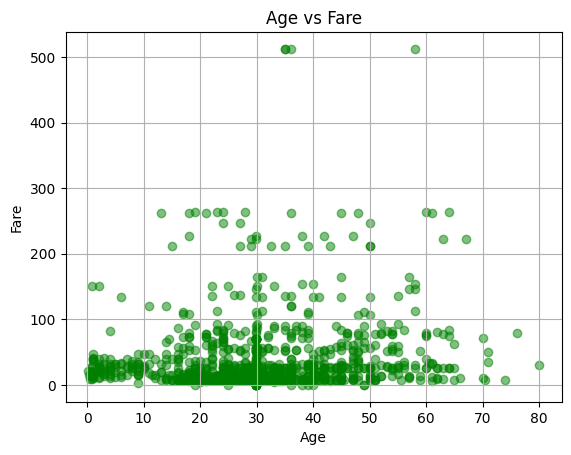

embarked
C    0.555556
Q    0.357724
S    0.334061
Name: survived, dtype: float64


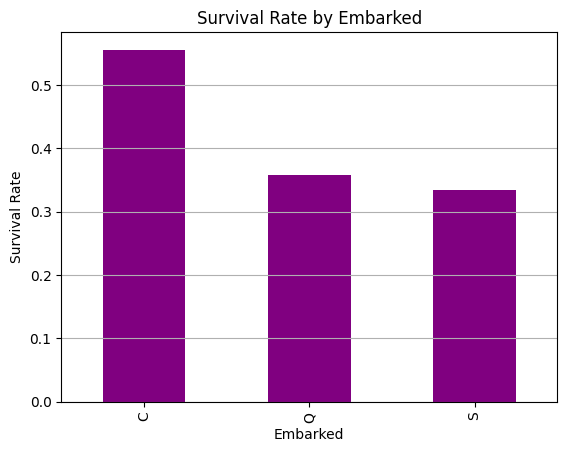

In [45]:
plt.scatter(dataset['age'], dataset['fare'], alpha=0.5, color='green')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

survival_rate = dataset.groupby('embarked')['survived'].mean()
print(survival_rate)
survival_rate.plot(kind='bar', color='purple')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.grid(axis='y')
plt.show()

In [49]:
gender_group = dataset.groupby('sex')

In [50]:
gender_group.get_group('male').head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


In [55]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


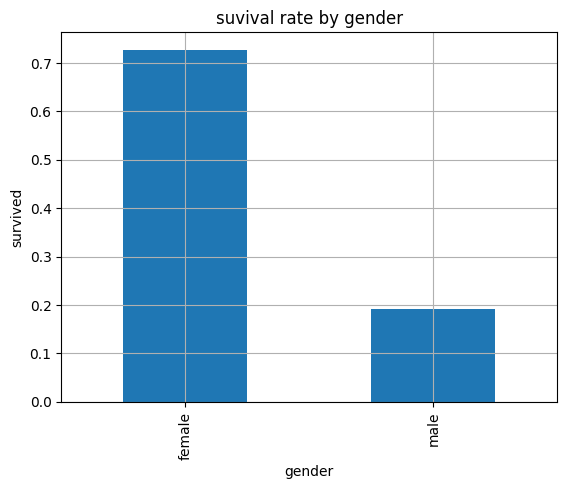

In [56]:
survival_rate_by_gender =  dataset.groupby('sex')['survived'].mean()
survival_rate_by_gender.plot(kind='bar')
plt.grid(True)
plt.title("suvival rate by gender")
plt.xlabel("gender")
plt.ylabel("survived")
plt.show()